## Weeks 7-8 Charts
### Data Source: https://www.kaggle.com/datasets/jehanzaibbhatti/sales-data
### Objective: 1 scatterplot, 1 bubble chart and 1 density plot chart


In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

#warnings.filterwarnings('ignore')

In [297]:
people = pd.read_csv('state_people.csv')
people.head()

,State,Population,Race_White,Race_Black,Race_Asian,Race_Native,Race_Hispanic,Race_Multi,Alone_65,Under18,Over65,UnderHS,Ed_HSDiploma,Ed_SomeCollege,Ed_Assoc,Ed_Degree
0,Alaska,1463090,62.24,3.00,5.12,14.02,5.37,7.09,2.69,26.43,7.74,7.22,28.12,26.70,8.53,29.42
1,Alabama,9806370,65.35,25.38,1.08,0.53,3.79,1.45,4.45,23.69,13.73,13.78,30.74,21.41,8.50,25.58
2,Arkansas,6035608,72.02,14.82,1.18,0.67,6.17,1.89,4.49,24.44,14.32,13.41,33.94,22.32,7.14,23.19
3,Arizona,14557434,50.77,3.28,2.34,3.54,26.04,3.00,3.93,25.51,13.75,12.87,23.83,25.16,8.62,29.52
4,California,79024446,37.85,5.48,12.09,0.41,35.47,4.59,3.14,24.96,11.40,16.78,20.57,21.11,7.85,33.69


In [298]:
spending = pd.read_csv('state_spending.csv')
spending.head()

,State,Millions,PC_Basic_Ed,PC_Higher_Ed,PC_Public_Assist,PC_Medicaid,PC_Corrections,PC_Transportation,PC_Other,PC_Total
0,Alabama,19138,0.266,0.260,0.000,0.090,0.036,0.039,0.308,1.0
1,Alaska,7123,0.199,0.086,0.008,0.090,0.049,0.072,0.495,1.0
2,Arizona,23401,0.240,0.247,0.000,0.143,0.056,0.092,0.222,1.0
3,Arkansas,18221,0.169,0.208,0.011,0.089,0.029,0.059,0.434,1.0
4,California,201372,0.260,0.082,0.027,0.176,0.078,0.071,0.306,1.0


In [299]:
crime= pd.read_csv('crimerates-by-state-2005.csv')
crime.head()

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
0,United States,5.6,31.7,140.7,291.1,726.7,2286.3,416.7,295753151
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221


In [300]:
crime = crime.iloc[1:]
crime = crime.rename(columns ={'state':'State'})
crime.head()

,State,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
1,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049
2,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488
3,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834
4,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221
5,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255


In [301]:
crime['population'] = crime['population']/1000000

In [302]:
# MERGE CRIME< DEMOGRAPHIC<SPENDING 
df = crime.merge(people, on = 'State', how = 'inner')
df = df.merge(spending, on = 'State', how = 'inner')

# Save new File
#df.to_csv('crime_ed_money.csv', index = False)

In [303]:
df.describe()

,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,Population,Race_White,...,Ed_Degree,Millions,PC_Basic_Ed,PC_Higher_Ed,PC_Public_Assist,PC_Medicaid,PC_Corrections,PC_Transportation,PC_Other,PC_Total
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,4.714000,33.800000,102.754000,260.350000,691.316000,2295.658000,362.834000,5.903422,1.310135e+07,67.819200,...,31.286000,29017.080000,0.246100,0.150000,0.004240,0.139240,0.038340,0.073800,0.348240,1.0
std,2.366347,11.379825,57.319795,132.656168,236.066567,516.879959,207.848335,6.549443,1.477856e+07,15.623607,...,5.187303,32779.363876,0.073031,0.087093,0.005677,0.049887,0.011286,0.028569,0.117592,0.0
min,1.100000,13.900000,7.400000,61.700000,311.900000,1343.700000,102.000000,0.506242,1.157518e+06,21.850000,...,20.760000,2977.000000,0.127000,0.025000,0.000000,0.055000,0.020000,0.026000,0.145000,1.0
25%,2.550000,26.125000,66.000000,150.750000,492.400000,1853.575000,214.975000,1.764771,3.655424e+06,58.740000,...,27.737500,10342.250000,0.199000,0.076750,0.001250,0.097250,0.031000,0.055500,0.256500,1.0
50%,4.700000,33.300000,95.400000,231.750000,665.150000,2353.150000,317.800000,4.219246,9.116467e+06,70.785000,...,30.790000,18679.500000,0.237000,0.145000,0.002000,0.127000,0.036500,0.070000,0.315000,1.0
75%,6.575000,40.250000,150.075000,353.675000,924.650000,2697.975000,419.075000,6.405094,1.506170e+07,78.507500,...,34.147500,37044.000000,0.279500,0.206000,0.004000,0.175750,0.045750,0.087750,0.447750,1.0
max,9.900000,81.100000,256.700000,579.000000,1201.100000,3308.400000,1115.200000,35.795255,7.902445e+07,96.320000,...,43.680000,201372.000000,0.485000,0.367000,0.027000,0.270000,0.078000,0.145000,0.625000,1.0


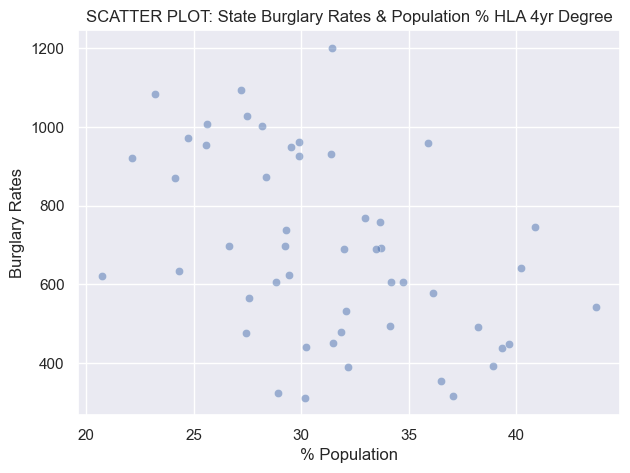

In [325]:
#set seaborn style
plt.figure(figsize=(7, 5))
    
#create area chart
sns.scatterplot(y=df['burglary'], x=df['Ed_Degree'], alpha = .5)

#add axis labels
plt.xlabel('% Population')
plt.ylabel('Burglary Rates')
plt.title('SCATTER PLOT: State Burglary Rates & Population % HLA 4yr Degree')

#display area chart
plt.show()

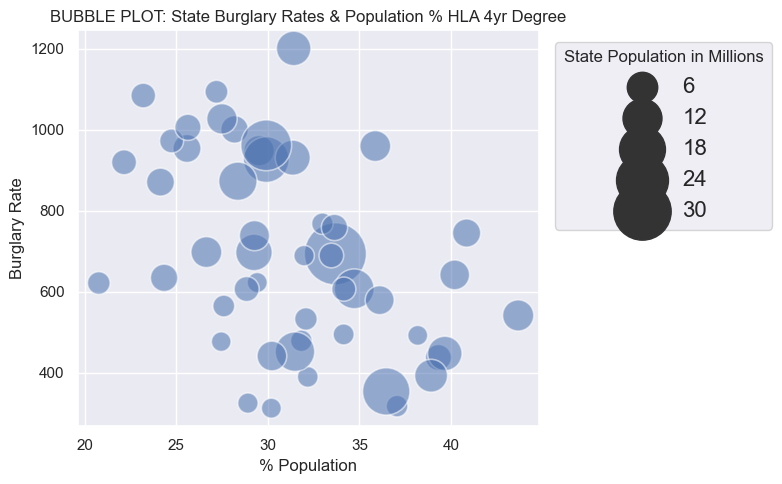

In [326]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Ed_Degree', 
                y='burglary',
                size = 'population',
                sizes=(200,2000),
                alpha=0.55,
                data=df)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=16,title = 'State Population in Millions')
#
  
# Put the legend out of the figure
plt.xlabel("% Population")
plt.ylabel("Burglary Rate")
plt.title("BUBBLE PLOT: State Burglary Rates & Population % HLA 4yr Degree", fontsize = 12)
plt.tight_layout()

In [306]:
df.columns

Index(['State', 'murder', 'forcible_rape', 'robbery', 'aggravated_assault',
       'burglary', 'larceny_theft', 'motor_vehicle_theft', 'population',
       'Population', 'Race_White', 'Race_Black', 'Race_Asian', 'Race_Native',
       'Race_Hispanic', 'Race_Multi', 'Alone_65', 'Under18', 'Over65',
       'UnderHS', 'Ed_HSDiploma', 'Ed_SomeCollege', 'Ed_Assoc', 'Ed_Degree',
       'Millions', 'PC_Basic_Ed', 'PC_Higher_Ed', 'PC_Public_Assist',
       'PC_Medicaid', 'PC_Corrections', 'PC_Transportation', 'PC_Other',
       'PC_Total'],
      dtype='object')

<Figure size 500x500 with 0 Axes>

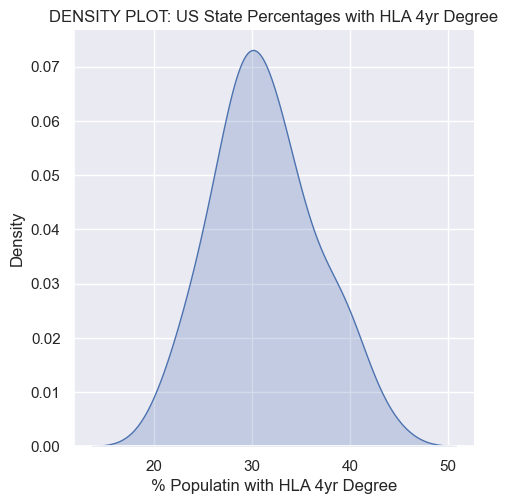

In [327]:
plt.figure(figsize=(5,5))

sns.displot(df['Ed_Degree'], kind='kde', fill = 'steelblue')

# Put the legend out of the figure
plt.xlabel('% Populatin with HLA 4yr Degree')
plt.ylabel("Density")
plt.title("DENSITY PLOT: US State Percentages with HLA 4yr Degree", fontsize = 12);